In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
dataset.info()
print('-'*90)
dataset.describe()
print('-'*90)
dataset.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
------------------------------------------------------------------------------------------
------------------------------------

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


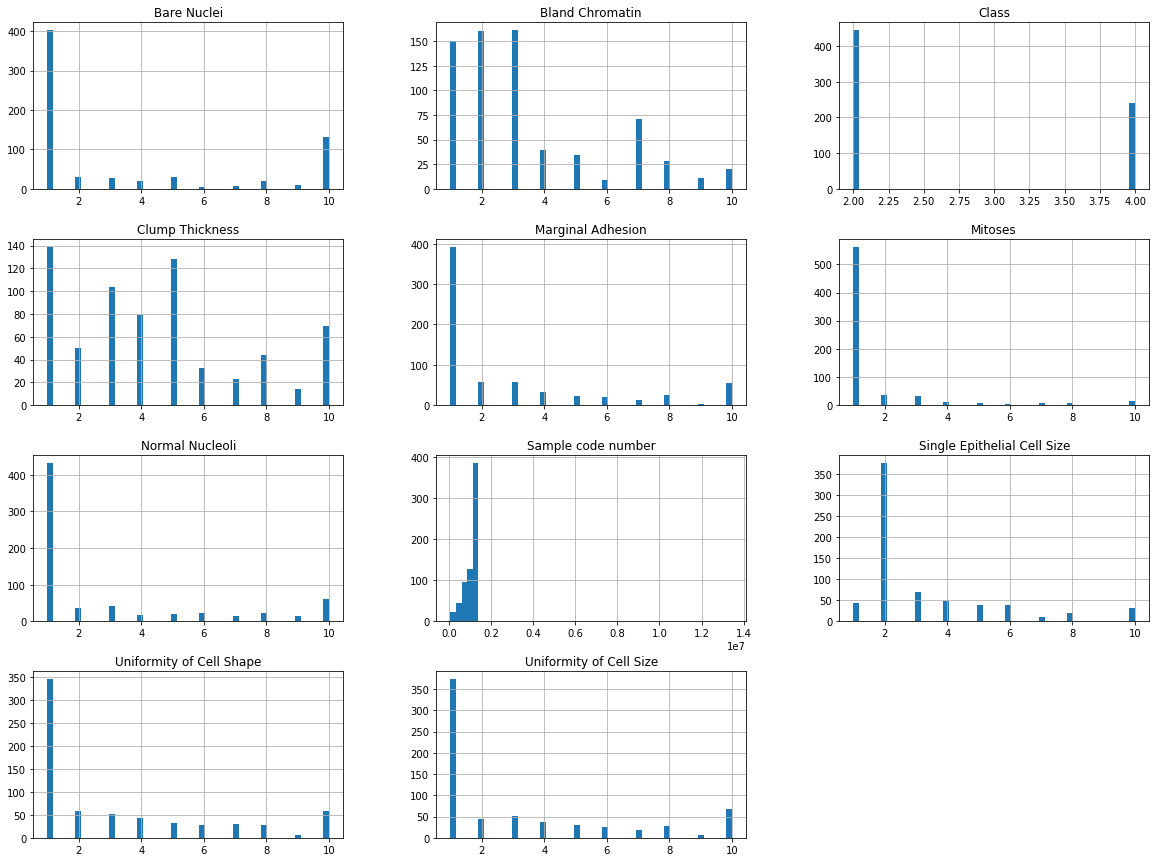

In [4]:
%matplotlib inline 
dataset.hist( bins = 50 , figsize = ( 20 , 15 )) 
plt.show()

In [7]:
corr_matrix = dataset.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Sample code number            -0.084701
Name: Class, dtype: float64

In [8]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
from sklearn.model_selection import cross_val_score

log_reg_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
log_reg_accuracies.mean() * 100

96.70033670033669

In [65]:
y_pred = classifier.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[84  3]
 [ 3 47]]


## Support Vector Machine

In [122]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [123]:
from sklearn.model_selection import cross_val_score

svm_rbf_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
svm_rbf_accuracies.mean() * 100

96.88888888888889

In [124]:
y_pred = classifier.predict(x_test)

In [125]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[83  4]
 [ 1 49]]


## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
from sklearn.model_selection import cross_val_score

nb_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
nb_accuracies.mean() * 100

96.52188552188554

In [77]:
y_pred = classifier.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[80  7]
 [ 0 50]]


## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [80]:
from sklearn.model_selection import cross_val_score

dec_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
dec_accuracies.mean() * 100

94.32659932659932

In [81]:
y_pred = classifier.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[84  3]
 [ 3 47]]


## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30,random_state=0,criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [105]:
from sklearn.model_selection import cross_val_score

ran_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
ran_accuracies.mean() * 100

96.7003367003367

In [106]:
y_pred = classifier.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[84  3]
 [ 1 49]]


## XGBoost

In [126]:
from xgboost import XGBClassifier
classifier= XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
from sklearn.model_selection import cross_val_score

xg_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
xg_accuracies.mean() * 100

96.88888888888889

In [128]:
y_pred = classifier.predict(x_test)

In [129]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[84  3]
 [ 1 49]]


## K Nearest Neighbors

In [130]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [131]:
from sklearn.model_selection import cross_val_score

knn_accuracies = cross_val_score(estimator=classifier,cv=10,X=x_train,y=y_train)
knn_accuracies.mean() * 100

97.43771043771042

In [132]:
y_pred = classifier.predict(x_test)

In [133]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[84  3]
 [ 1 49]]


### We consider the best fit K Nearest Neighbors

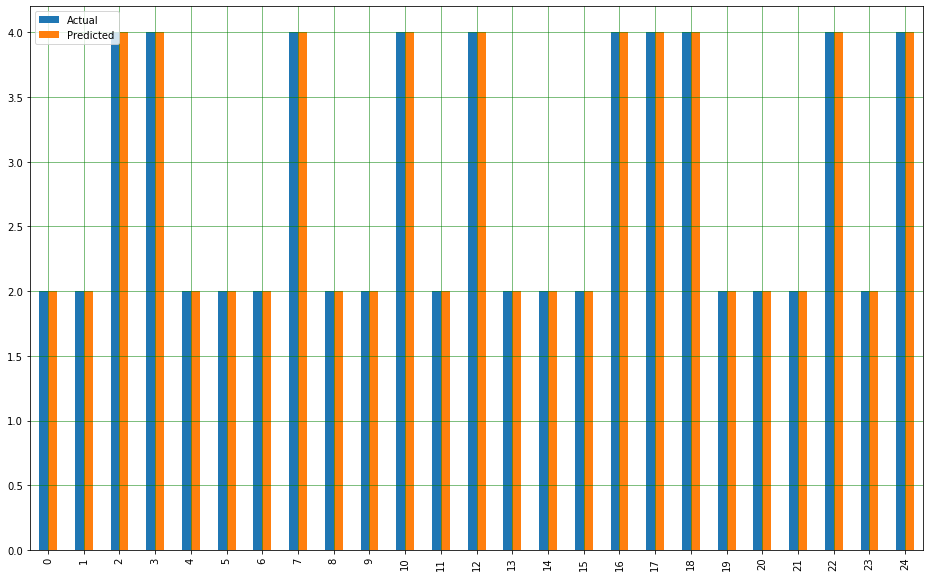

In [136]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted': y_pred.flatten()})
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()